In [1]:
"""Author: Sameer Vajjala Kesava

Predicting direction of stock market.

K-Nearest Neighbors Classifier using weights for the data points: 'uniform' and 'distances'.
Splitting the data into training set (data from years 2001 to 2004) and test set (2005 data). 
No Cross Validation employed (yet).
Plotting the training data after Classification.

Problem statement from Chapter 4
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn"""

"Author: Sameer Vajjala Kesava\n\nPredicting direction of stock market.\n\nK-Nearest Neighbors Classifier using weights for the data points: 'uniform' and 'distances'.\nSplitting the data into training set (data from years 2001 to 2004) and test set (2005 data). \nNo Cross Validation employed (yet).\nPlotting the training data after Classification.\n\nProblem statement from Chapter 4\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\n\nDataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\n\nPackages used: numpy, pandas, sklearn"

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_df = pd.read_csv("Smarket")
data_df.head(10)

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,6,2001.0,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,7,2001.0,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,8,2001.0,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,9,2001.0,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,10,2001.0,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [5]:
data_df.drop(columns='Unnamed: 0', inplace=True)
data_df.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
data_df.shape

(1250, 9)

In [7]:
data_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(8), object(1)
memory usage: 88.0+ KB


In [9]:
#Converting the Direction column to Category
data_df['Direction'] = data_df['Direction'].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null category
dtypes: category(1), float64(8)
memory usage: 79.5 KB


In [10]:
#pandas itself has plotting functions. Can use matplotlib or seaborn for statistical plotting
import matplotlib.pyplot as plt
data_df['Volume'].hist()

#### Checking correlations between different variables

In [11]:
#different methods available.
#automatically ignores non-numeric variables
data_df.corr(method='pearson')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


#### K-Nearest Neighbors to predict stock market direction

In [12]:
#models
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

#### Splitting data into train (2001-2004) and test (2005) sets

In [13]:
#Leaving out 2005 year data out of training set
data_df.set_index('Year').head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [14]:
train_data = data_df.set_index('Year')
train_data.drop(index = 2005, inplace=True)

In [15]:
train_data.tail()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2004.0,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
2004.0,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
2004.0,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
2004.0,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up
2004.0,0.008,-0.007,0.715,-0.431,0.046,0.8298,-0.134,Down


In [16]:
train_data.shape

(998, 8)

In [17]:
#Final form of training data. From previous Logistic Regression fitting, it appears only Lag1 and Lag2 seem to have an influence over prediction.
#Hence using only Lag1 and Lag2 for training
train_data_fit = train_data.drop(columns=['Lag3', 'Lag4', 'Lag5', 'Today', 'Volume'])
train_data_fit.head()

,Lag1,Lag2,Direction
Year,,,
2001.0,0.381,-0.192,Up
2001.0,0.959,0.381,Up
2001.0,1.032,0.959,Down
2001.0,-0.623,1.032,Up
2001.0,0.614,-0.623,Up


In [18]:
train_data_fit.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 998 entries, 2001.0 to 2004.0
Data columns (total 3 columns):
Lag1         998 non-null float64
Lag2         998 non-null float64
Direction    998 non-null category
dtypes: category(1), float64(2)
memory usage: 24.5 KB


In [19]:
#Setting X_train for fitting
x_true = train_data_fit.drop(['Direction'], axis = 1)
x_true.head()

,Lag1,Lag2
Year,,
2001.0,0.381,-0.192
2001.0,0.959,0.381
2001.0,1.032,0.959
2001.0,-0.623,1.032
2001.0,0.614,-0.623


In [20]:
#Settng Y_train for fitting
y_true = train_data_fit[['Direction']]
y_true.head()

,Direction
Year,
2001.0,Up
2001.0,Up
2001.0,Down
2001.0,Up
2001.0,Up


In [21]:
y_true['Direction'].values

[Up, Up, Down, Up, Up, ..., Down, Up, Down, Up, Down]
Length: 998
Categories (2, object): [Down, Up]

In [22]:
#testing different weights for the querying points and k=5
k_neighbors = 5
knn_uniform =  KNeighborsClassifier(n_neighbors=k_neighbors, weights = 'uniform', algorithm='auto')
knn_distances = KNeighborsClassifier(n_neighbors=k_neighbors, weights = 'distance', algorithm='auto')

In [23]:
fit_data_uniform = knn_uniform.fit(X=x_true, y = y_true['Direction'].values)
fit_data_distances = knn_distances.fit(X=x_true, y = y_true['Direction'].values)

In [24]:
print('knn_uniform Classes:', fit_data_uniform.classes_)
print('knn_distances Classes:', fit_data_distances.classes_)

knn_uniform Classes: ['Down' 'Up']
knn_distances Classes: ['Down' 'Up']


#### Parameters of the Algorithm

In [25]:
#metric
print('Metric-Uniform', fit_data_uniform.effective_metric_)
print('Metric-Distances', fit_data_distances.effective_metric_)

Metric-Uniform euclidean
Metric-Distances euclidean


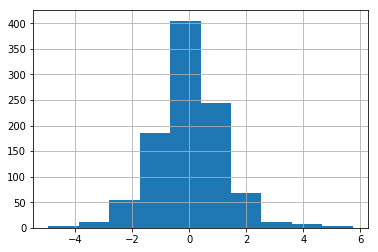

In [26]:
x_true['Lag1'].hist()

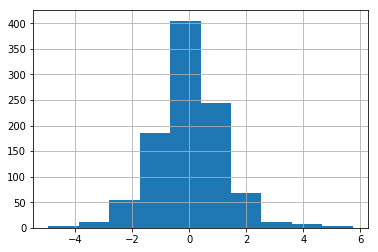

In [27]:
x_true['Lag2'].hist()

In [28]:
grouped = train_data_fit.groupby('Direction')

In [29]:
grouped.describe()

Lag1                                                           \
           count      mean       std    min     25%    50%     75%    max   
Direction                                                                   
Down       491.0  0.042790  1.227446 -4.922 -0.6405  0.104  0.7035  5.733   
Up         507.0 -0.039546  1.231668 -4.318 -0.7595 -0.052  0.5795  5.408   

            Lag2                                                           
           count      mean       std    min     25%    50%     75%    max  
Direction                                                                  
Down       491.0  0.033894  1.239191 -4.922 -0.6425  0.094  0.7590  4.005  
Up         507.0 -0.031325  1.220765 -3.439 -0.7315 -0.021  0.5775  5.733

#### Calculating statistics of the fit

In [30]:
y_true.nunique()

Direction    2
dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix

cm_uniform =  confusion_matrix(y_true['Direction'].values, fit_data_uniform.predict(x_true))

cmdf_uniform = pd.DataFrame(cm_uniform, index = [list(y_true.columns)*y_true.nunique()[0], fit_data_uniform.classes_],\
                    columns = [['Predicted']*y_true.nunique()[0], fit_data_uniform.classes_])
print('Confusion Matrix for training data using uniform weighting: \n', cmdf_uniform)

Confusion Matrix for training data using uniform weighting: 
                Predicted     
                    Down   Up
Direction Down       331  160
          Up         163  344


In [32]:
print('Training error rate using uniform weighting is {0:.2%}'.format(1 - fit_data_uniform.score(x_true,y_true)))

Training error rate using uniform weighting is 32.36%


In [33]:
cm_distances =  confusion_matrix(y_true['Direction'].values, fit_data_distances.predict(x_true))

cmdf_distances = pd.DataFrame(cm_distances, index = [list(y_true.columns)*y_true.nunique()[0], fit_data_distances.classes_],\
                    columns = [['Predicted']*y_true.nunique()[0], fit_data_distances.classes_])
print('Confusion Matrix for training data using distances weighting: \n', cmdf_distances)

Confusion Matrix for training data using distances weighting: 
                Predicted     
                    Down   Up
Direction Down       491    0
          Up           0  507


In [34]:
print('Training error rate using distances weighting is {0:.2%}'.format(1 - fit_data_distances.score(x_true,y_true)))

Training error rate using distances weighting is 0.00%


##### Fitting to the test data (2005 data)

In [35]:
test_data = data_df.set_index('Year').loc[2005]

In [36]:
test_data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2005.0,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
2005.0,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
2005.0,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
2005.0,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
2005.0,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [37]:
test_data_fit = test_data.drop(columns = test_data.columns[2:7])
test_data_fit.head()

,Lag1,Lag2,Direction
Year,,,
2005.0,-0.134,0.008,Down
2005.0,-0.812,-0.134,Down
2005.0,-1.167,-0.812,Down
2005.0,-0.363,-1.167,Up
2005.0,0.351,-0.363,Down


In [38]:
test_data_fit.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 252 entries, 2005.0 to 2005.0
Data columns (total 3 columns):
Lag1         252 non-null float64
Lag2         252 non-null float64
Direction    252 non-null category
dtypes: category(1), float64(2)
memory usage: 6.2 KB


In [39]:
#testing
test_data_fit.iloc[:,1].head()

Year
2005.0    0.008
2005.0   -0.134
2005.0   -0.812
2005.0   -1.167
2005.0   -0.363
Name: Lag2, dtype: float64

In [40]:
x_test = test_data_fit.drop(columns = 'Direction', axis = 1)
x_test.head()

,Lag1,Lag2
Year,,
2005.0,-0.134,0.008
2005.0,-0.812,-0.134
2005.0,-1.167,-0.812
2005.0,-0.363,-1.167
2005.0,0.351,-0.363


In [41]:
y_test = test_data_fit[['Direction']]
y_test.head()

,Direction
Year,
2005.0,Down
2005.0,Down
2005.0,Down
2005.0,Up
2005.0,Down


In [42]:
test_cm_uniform =  confusion_matrix(y_test.values, fit_data_uniform.predict(x_test))

test_cmdf_uniform = pd.DataFrame(test_cm_uniform, index = [list(y_test.columns)*y_test.nunique()[0], fit_data_uniform.classes_],\
                    columns = [['Predicted']*y_test.nunique()[0], fit_data_uniform.classes_])
print('Confusion Matrix for Test data using uniform weighting: \n', test_cmdf_uniform.transpose())

Confusion Matrix for Test data using uniform weighting: 
                Direction    
                    Down  Up
Predicted Down        40  59
          Up          71  82


In [43]:
print('Test error rate using uniform weighting is {0:.2%}'.format(1 - fit_data_uniform.score(x_test,y_test)))

Test error rate using uniform weighting is 51.59%


In [44]:
test_cm_distances =  confusion_matrix(y_test.values, fit_data_distances.predict(x_test))

test_cmdf_distances = pd.DataFrame(test_cm_distances, index = [list(y_test.columns)*y_test.nunique()[0], fit_data_distances.classes_],\
                    columns = [['Predicted']*y_test.nunique()[0], fit_data_distances.classes_])
print('Confusion Matrix for Test data using distances weighting: \n', test_cmdf_distances.transpose())

Confusion Matrix for Test data using distances weighting: 
                Direction    
                    Down  Up
Predicted Down        40  54
          Up          71  87


In [45]:
print('Test error rate using disances weighting is {0:.2%}'.format(1 - fit_data_distances.score(x_test,y_test)))

Test error rate using disances weighting is 49.60%


In [46]:
"""Using k=1 results in error rate of 50%. QDA appears to be the best method for this data"""

'Using k=1 results in error rate of 50%. QDA appears to be the best method for this data'

##### Posterior Probability Calculation using Distance Weighting

In [47]:
pred_prob_test_df = pd.DataFrame(fit_data_distances.predict_proba(x_test), columns = fit_data_distances.classes_)
pred_prob_test_df.head()

,Down,Up
0,0.292819,0.707181
1,0.572456,0.427544
2,0.278707,0.721293
3,0.258774,0.741226
4,0.341161,0.658839


In [48]:
pred_prob_test_df[pred_prob_test_df['Up']>=0.5].count()

Down    158
Up      158
dtype: int64

In [49]:
pred_prob_test_df[pred_prob_test_df['Up']<0.5].count()

Down    94
Up      94
dtype: int64

In [50]:
#Maximum probability estimated for Down
pred_prob_test_df['Down'].max()

1.0

In [51]:
#Maximum probability estimated for Up
pred_prob_test_df['Up'].max()

1.0

#### Plotting

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors

In [53]:
y_pred = fit_data_distances.predict(x_true)
print(y_pred[:5])
print(len(y_pred))

['Up' 'Up' 'Down' 'Up' 'Up']
998


In [54]:
train_data_fit.head()

,Lag1,Lag2,Direction
Year,,,
2001.0,0.381,-0.192,Up
2001.0,0.959,0.381,Up
2001.0,1.032,0.959,Down
2001.0,-0.623,1.032,Up
2001.0,0.614,-0.623,Up


In [55]:
train_data_fit.count()

Lag1         998
Lag2         998
Direction    998
dtype: int64

In [56]:
#Resetting index of training data
train_data_fit.reset_index(inplace=True)
train_data_fit.head()

,Year,Lag1,Lag2,Direction
0,2001.0,0.381,-0.192,Up
1,2001.0,0.959,0.381,Up
2,2001.0,1.032,0.959,Down
3,2001.0,-0.623,1.032,Up
4,2001.0,0.614,-0.623,Up


In [57]:
#Correct predictions
correct_pred = train_data_fit[train_data_fit['Direction'] == y_pred]
len(correct_pred)

998

In [58]:
correct_pred.head()

,Year,Lag1,Lag2,Direction
0,2001.0,0.381,-0.192,Up
1,2001.0,0.959,0.381,Up
2,2001.0,1.032,0.959,Down
3,2001.0,-0.623,1.032,Up
4,2001.0,0.614,-0.623,Up


In [59]:
#True positive for Down
true_pos_down = correct_pred[correct_pred['Direction'] == 'Down']
true_pos_down.head()

,Year,Lag1,Lag2,Direction
2,2001.0,1.032,0.959,Down
6,2001.0,1.392,0.213,Down
10,2001.0,0.287,1.303,Down
11,2001.0,-0.498,0.287,Down
14,2001.0,0.701,0.680,Down


In [60]:
#True position for Up
true_pos_up = correct_pred[correct_pred['Direction'] == 'Up']
true_pos_up.head()

,Year,Lag1,Lag2,Direction
0,2001.0,0.381,-0.192,Up
1,2001.0,0.959,0.381,Up
3,2001.0,-0.623,1.032,Up
4,2001.0,0.614,-0.623,Up
5,2001.0,0.213,0.614,Up


In [61]:
#False predictions
false_pred = train_data_fit.drop(index = correct_pred.index)
false_pred.head()

,Year,Lag1,Lag2,Direction


In [62]:
#Training data corresponding to False positive i.e. predicts Up if True is Down
false_pos_down = false_pred[false_pred['Direction'] == 'Down']
false_pos_down.head()

,Year,Lag1,Lag2,Direction


In [63]:
#Training data corresponding to False negative i.e. predicts Down if True is Up
false_neg_up = false_pred.drop(index = false_pos_down.index)
false_neg_up.head()

,Year,Lag1,Lag2,Direction


In [64]:
#Line drawn for a given probability threshold
nx, ny = 200, 200
x_min, x_max = train_data_fit['Lag1'].min(), train_data_fit['Lag1'].max()
y_min, y_max = train_data_fit['Lag2'].min(), train_data_fit['Lag2'].max()
print(x_min, x_max)
print(y_min, y_max)

-4.922 5.733
-4.922 5.733


In [65]:
#Creating a meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

In [66]:
xx.shape

(200, 200)

In [67]:
yy.shape

(200, 200)

In [68]:
#equivalent to using 'np.vstack((xt.ravel(), yt.ravel())).transpose()'. Gives the set of coordinates of the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]

In [69]:
mesh_points.shape

(40000, 2)

In [70]:
#Predicting probabilities using the fit corresponding the mesh points
Z = fit_data_distances.predict_proba(mesh_points)
Z

array([[0.45259528, 0.54740472],
       [0.45431973, 0.54568027],
       [0.45609727, 0.54390273],
       ...,
       [0.16742598, 0.83257402],
       [0.16702646, 0.83297354],
       [0.16664763, 0.83335237]])

In [71]:
Z.shape

(40000, 2)

In [72]:
#Choosing one probability column (the other is 1 - this) and reshaping to match the coordinate system shape
Z = Z[:,1].reshape(xx.shape)

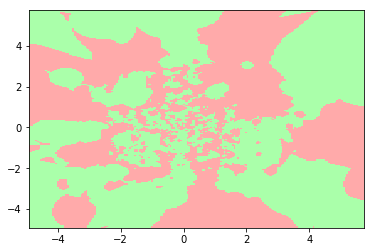

In [73]:
# Setting the desired Colormap for colormesh, '#AAAAFF'
cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.cm.register_cmap(cmap=cmap_light)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [74]:
grouped_df = grouped.describe()
grouped_df

Lag1                                                           \
           count      mean       std    min     25%    50%     75%    max   
Direction                                                                   
Down       491.0  0.042790  1.227446 -4.922 -0.6405  0.104  0.7035  5.733   
Up         507.0 -0.039546  1.231668 -4.318 -0.7595 -0.052  0.5795  5.408   

            Lag2                                                           \
           count      mean       std    min     25%    50%     75%    max   
Direction                                                                   
Down       491.0  0.033894  1.239191 -4.922 -0.6425  0.094  0.7590  4.005   
Up         507.0 -0.031325  1.220765 -3.439 -0.7315 -0.021  0.5775  5.733   

            Year                                                         \
           count         mean       std     min     25%     50%     75%   
Direction                                                                 
Down       491.0  2002.433809  1.101575  2001.0  2001.0  2002.0  2003.0   
Up         507.0  2002.593688  1.121387  2001.0  2002.0  2003.0  2004.0   

                   
              max  
Direction          
Down       2004.0  
Up         2004.0

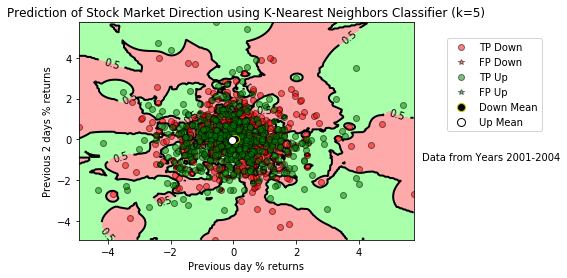

In [75]:
#Plotting training set classification
fig, ax = plt.subplots(1,1)
alpha = 0.5

ax.set_xlabel('Previous day % returns')
ax.set_ylabel('Previous 2 days % returns')
#Class Down
ax.plot(true_pos_down['Lag1'], true_pos_down['Lag2'], 'o', alpha=alpha, color = 'red', markeredgecolor = 'k', label = 'TP Down')
ax.plot(false_pos_down['Lag1'], false_pos_down['Lag2'], '*', alpha=alpha, color = 'red', markeredgecolor = 'k', label = 'FP Down')#dark red

#Class Up
ax.plot(true_pos_up['Lag1'], true_pos_up['Lag2'], 'o', alpha=alpha, color = 'green', markeredgecolor = 'k', label = 'TP Up')
ax.plot(false_neg_up['Lag1'], false_neg_up['Lag2'], '*', alpha=alpha, color = 'green', markeredgecolor = 'k', label = 'FP Up')#dark blue

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

#drawing a contour line using the probability threshold (0.5 in this case)
CS = ax.contour(xx, yy, Z, [0.5], linewidths=2, colors='k')
fmt = str(CS.levels[0])
ax.clabel(CS, CS.levels,fmt = fmt)

#means for Down and Up
ax.plot(grouped_df.loc['Down']['Lag1']['mean'], grouped_df.loc['Down']['Lag2']['mean'],'o',\
        color='black', markersize=8, markeredgecolor='y', label = 'Down Mean')
ax.plot(grouped_df.loc['Up']['Lag1']['mean'], grouped_df.loc['Up']['Lag2']['mean'],'o',\
        color='white', markersize=8, markeredgecolor='k', label = 'Up Mean')

lgd = ax.legend(loc = (1.1, 0.5))

ax.set_title('Prediction of Stock Market Direction using K-Nearest Neighbors Classifier (k=5)')
ax.text(x =6, y= -1, s = 'Data from Years 2001-2004')
ax.axis('tight')

plt.show()

In [76]:
fig.savefig('KNN_k-' + str(k_neighbors) + '.png', dpi = 200, format = 'png', bbox_extra_artists = (lgd,), bbox_inches = 'tight')